In [27]:
# Imports

import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.express as px
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn import preprocessing
import scipy.stats

In [48]:
# Reading in pickle files

# File of all connectors with information about om, pre_type, etc
links = pd.read_pickle("/Users/deenashefter/Downloads/200506_linkdf.pickle", compression='infer')
df_links = pd.DataFrame(links)
display(df_links)

# File of all connectors with their xyz coordinates
cx_coords = pd.read_pickle("/Users/deenashefter/Downloads/200506_cxcoords.pickle", compression='infer')
df_cx_coords = pd.DataFrame(cx_coords)
display(df_cx_coords)

,link_id,cx_id,pre_neuron,pre_om,pre_type,pre_skel,post_neuron,post_om,post_type,post_skel
0,194220,276258,omB6_LN,B6,LMC_N,25,omB6_L1,B6,LMC_1,175606
1,175596,276258,omB6_LN,B6,LMC_N,25,omB6_L2,B6,LMC_2,44725
2,175139,276258,omB6_LN,B6,LMC_N,25,omB6_L1,B6,LMC_1,175606
3,175128,276258,omB6_LN,B6,LMC_N,25,omB6_R3,B6,R3R6,174970
4,175628,277482,omB6_LN,B6,LMC_N,25,168408,UNKNOWN,UNKNOWN,168408
...,...,...,...,...,...,...,...,...,...,...
20626,318465,479967,omC2_centri_nc,C2,centri,319210,omC2_centri_nc,C2,centri,319210
20627,318468,479967,omC2_centri_nc,C2,centri,319210,omC2_R4_nc,C2,R1R4,294885
20628,318467,479967,omC2_centri_nc,C2,centri,319210,omC2_L1_nc,C2,LMC_1,309836
20629,318466,479967,omC2_centri_nc,C2,centri,319210,omC2_R7p_nc,C2,R7p,294545


,x,y,z
100013,34692.0,69808.0,22740.0
100019,34480.0,69906.9,22972.0
100028,33956.0,69872.0,22682.0
100042,33472.0,70016.0,22532.7
100050,33716.0,70016.0,22618.7
...,...,...,...
99945,35968.0,69148.0,21728.0
99953,35736.0,69612.0,21960.0
99964,35196.0,69552.0,22286.0
99975,35488.0,69744.0,22676.0


In [49]:
# Preprocessing function, making dataframe of index cx_id and pre_om, pre_type, coordinates

def preprocessing():
    df_new = df_links[['cx_id','pre_om','pre_type', 'post_om', 'post_type']]
    df_c = pd.merge(df_new, df_cx_coords.reset_index(), left_on='cx_id',right_on='index').drop(['index'], axis=1)
    df_comp = df_c[df_c.post_om != 'UNKNOWN'].drop_duplicates()
    df_comp.to_csv(r'C:\Documents\Flatiron Internship\Lamina Analysis\export_df.csv')
    return df_comp
    
df_comp = preprocessing()
df_comp

,cx_id,pre_om,pre_type,post_om,post_type,x,y,z
0,276258,B6,LMC_N,B6,LMC_1,31888.0,71926.0,18790.0
1,276258,B6,LMC_N,B6,LMC_2,31888.0,71926.0,18790.0
3,276258,B6,LMC_N,B6,R3R6,31888.0,71926.0,18790.0
5,277482,B6,LMC_N,B6,LMC_1,35203.0,69086.0,18153.0
6,414327,E7,LMC_N,E7,LMC_1,35680.0,72202.4,25040.0
...,...,...,...,...,...,...,...,...
20626,479967,C2,centri,C2,centri,29532.0,69569.7,34520.0
20627,479967,C2,centri,C2,R1R4,29532.0,69569.7,34520.0
20628,479967,C2,centri,C2,LMC_1,29532.0,69569.7,34520.0
20629,479967,C2,centri,C2,R7p,29532.0,69569.7,34520.0


In [55]:
# Function to do PCA

def do_PCA(coordinates):
    pca = PCA(n_components=1)
    pca.fit(coordinates)
    pca.components_ *= -np.sign(pca.components_[0,0])
    trans_all = pca.transform(coordinates)
    return trans_all

# Function to normalize om coords

def normalize(trans):
    normalized = (trans-np.min(trans))/(np.max(trans)-np.min(trans))
    return normalized

In [51]:
# Makes df with transformed coords

dfd = df_comp.copy()
dfd["transformed_coords"] = np.nan
for om, rows in df_comp.groupby('pre_om'):
    coords = rows.loc[:, ['x', 'y', 'z']]
    trans_all = do_PCA(coords)
    
    # Normalizing from 0-1
    
    normalized = normalize(trans_all)
    norm_list = [x[0] for x in normalized]
    dfd.loc[dfd["pre_om"]==om,"transformed_coords"] = norm_list
display(dfd)

,cx_id,pre_om,pre_type,post_om,post_type,x,y,z,transformed_coords
0,276258,B6,LMC_N,B6,LMC_1,31888.0,71926.0,18790.0,0.549390
1,276258,B6,LMC_N,B6,LMC_2,31888.0,71926.0,18790.0,0.549390
3,276258,B6,LMC_N,B6,R3R6,31888.0,71926.0,18790.0,0.549390
5,277482,B6,LMC_N,B6,LMC_1,35203.0,69086.0,18153.0,0.000000
6,414327,E7,LMC_N,E7,LMC_1,35680.0,72202.4,25040.0,0.000000
...,...,...,...,...,...,...,...,...,...
20626,479967,C2,centri,C2,centri,29532.0,69569.7,34520.0,0.401034
20627,479967,C2,centri,C2,R1R4,29532.0,69569.7,34520.0,0.401034
20628,479967,C2,centri,C2,LMC_1,29532.0,69569.7,34520.0,0.401034
20629,479967,C2,centri,C2,R7p,29532.0,69569.7,34520.0,0.401034


In [54]:
# Comparing untransformed/transformed coordinates

# df = dfd.loc[dfd['pre_type'] == 'LMC_2']
df = dfd

pre_oms = dfd['pre_om'].unique()

for o in pre_oms:
    dfo = df.loc[df['pre_om'] == o]
    mt = max(dfo['transformed_coords'])
    dft = dfo.loc[dfo['transformed_coords'] == mt]
    dft = dft[['x','transformed_coords']]
    print("--------PRINTING DF WHERE TC IS MAX-----------")
    print(dft)
    print("--------PRINTING DF WHERE X IS MAX-----------")
    m = max(dfo['x'])
    print("for pre_om", o, m, "is the max x value")
    dfm = dfo.loc[dfo['x'] == m]
    dfm = dfm[['x','transformed_coords']]
    print(dfm)

--------PRINTING DF WHERE TC IS MAX-----------
             x  transformed_coords
10231  28320.0                 1.0
10232  28320.0                 1.0
10233  28320.0                 1.0
10234  28320.0                 1.0
10236  28320.0                 1.0
--------PRINTING DF WHERE X IS MAX-----------
for pre_om B6 35203.0 is the max x value
         x  transformed_coords
5  35203.0                 0.0
--------PRINTING DF WHERE TC IS MAX-----------
             x  transformed_coords
19459  29375.0                 1.0
19460  29375.0                 1.0
19461  29375.0                 1.0
19462  29375.0                 1.0
--------PRINTING DF WHERE X IS MAX-----------
for pre_om E7 35680.0 is the max x value
         x  transformed_coords
6  35680.0                 0.0
7  35680.0                 0.0
--------PRINTING DF WHERE TC IS MAX-----------
             x  transformed_coords
17215  35023.0                 1.0
17216  35023.0                 1.0
17217  35023.0                 1.0
-----

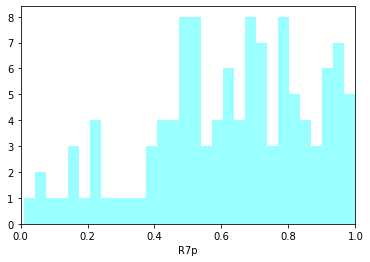

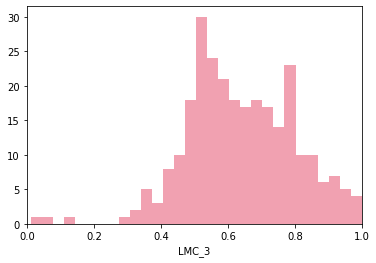

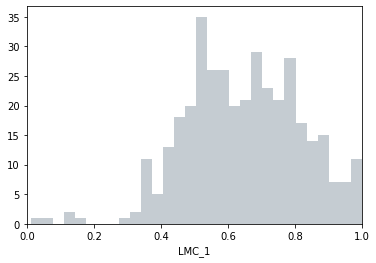

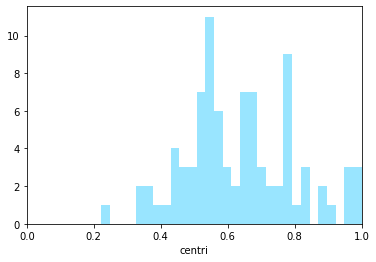

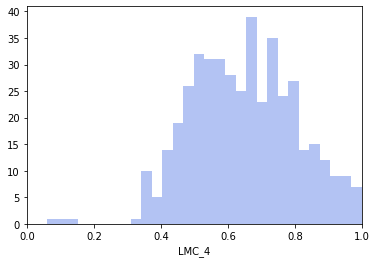

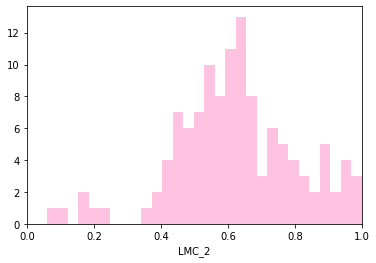

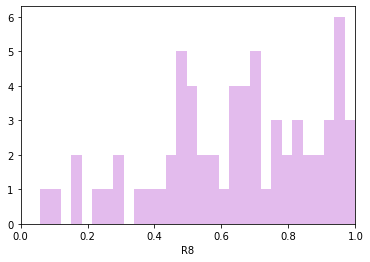

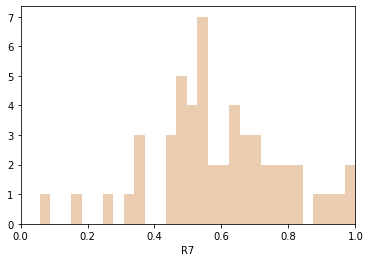

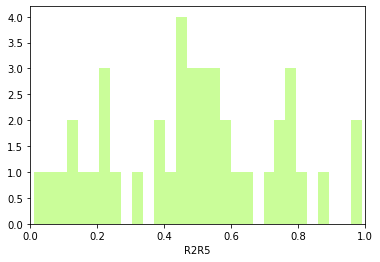

In [22]:
# Histograms - L2 pre
colors = {'LMC_N': 'tomato', 'centri': 'deepskyblue', 'R2R5': 'lawngreen', 'R3R6': 'gold', 'R1R4': 'orange', 'LMC_1': 'slategrey', 'LMC_3': 'crimson', 'LMC_2': 'hotpink', 'R7p': 'cyan', 'R8': 'mediumorchid', 'LMC_4': 'royalblue', 'R7': 'peru'}

df = dfd.loc[dfd['pre_type'] == 'LMC_2']
di = {}
for index, row in df.iterrows():
    if row['post_type'] not in ['LMC_N', 'R1R4', 'R3R6']:
        if row['post_type'] not in di:
            di[row['post_type']] = [row['transformed_coords']]
        else:
            di[row['post_type']].append(row['transformed_coords'])
    
for key,value in di.items():
    sns.distplot(value, bins=30, color=colors[key], kde=False)
    plt.xlabel(str(key))
    plt.xlim(0, 1)
#     plt.ylim(0, 40)
    plt.show()

In [31]:
sdf = pd.DataFrame()
sdf['type'] = di.keys()

s_li = []

for key,value in di.items():
    s = scipy.stats.skew(value)
    s_li.append(s)
    
sdf['skew'] = s_li
    
display(sdf)
    

,type,skew
0,R7p,-0.477484
1,LMC_3,-0.200399
2,LMC_1,-0.211330
3,centri,0.256156
4,LMC_4,-0.066052
5,LMC_2,-0.298686
6,R8,-0.460819
7,R7,-0.134936
8,R2R5,0.049865


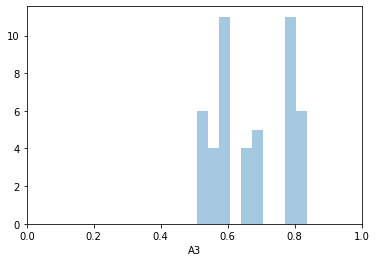

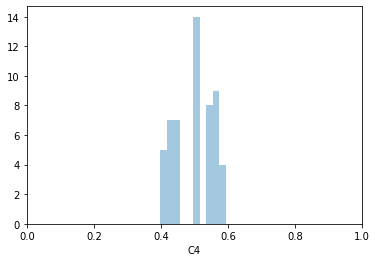

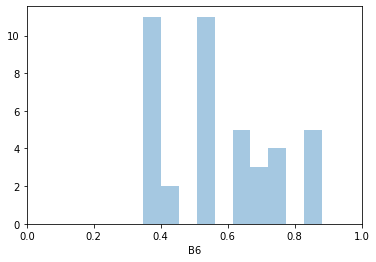

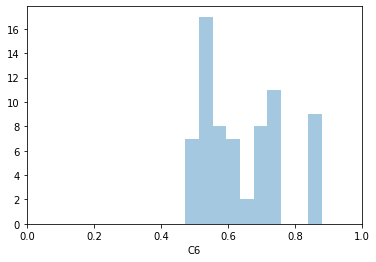

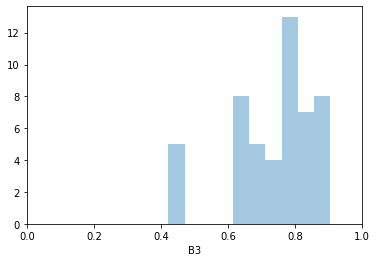

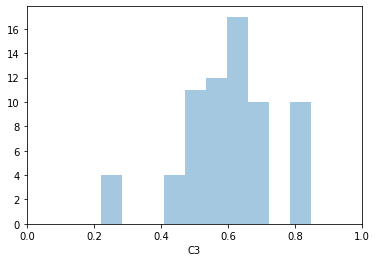

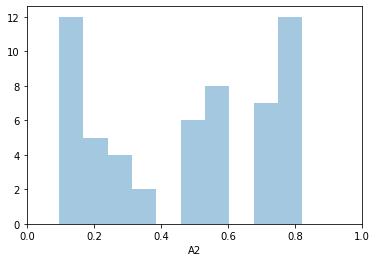

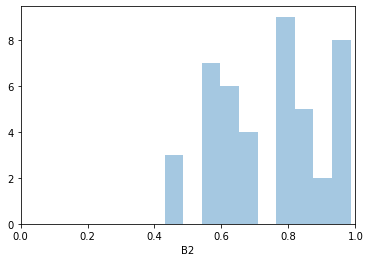

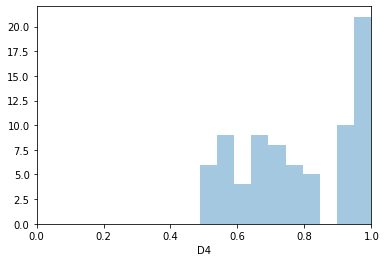

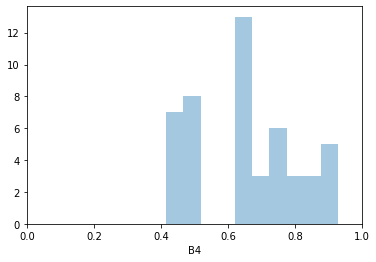

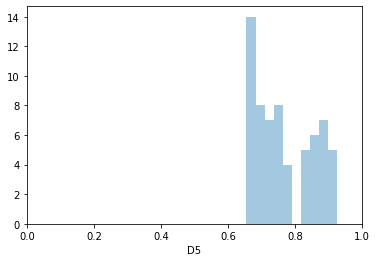

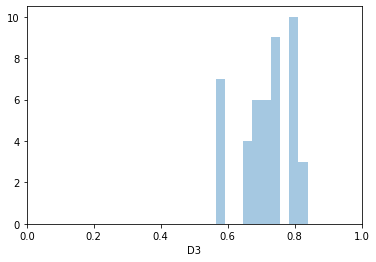

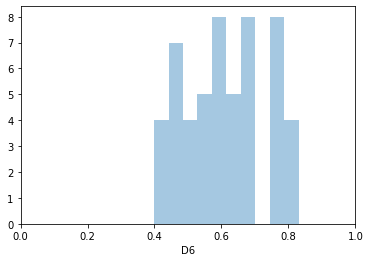

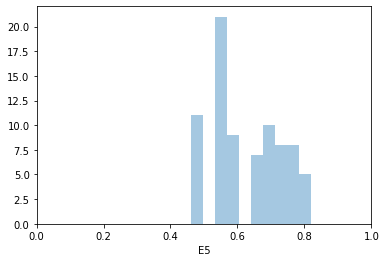

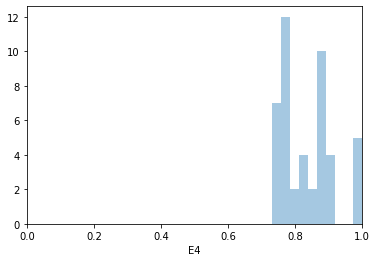

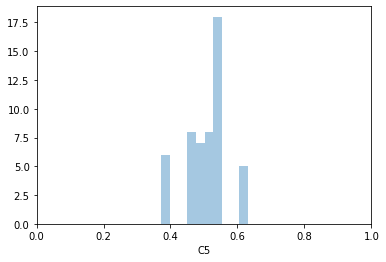

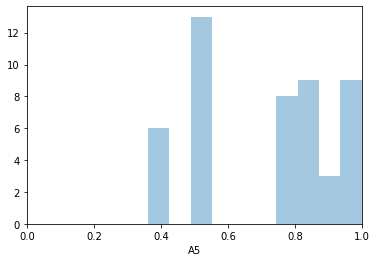

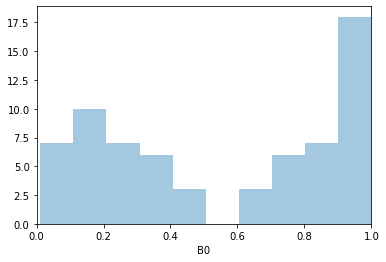

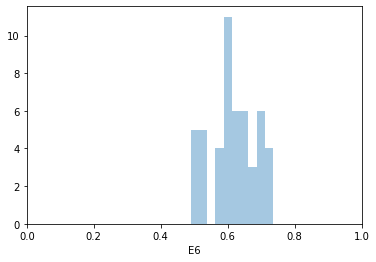

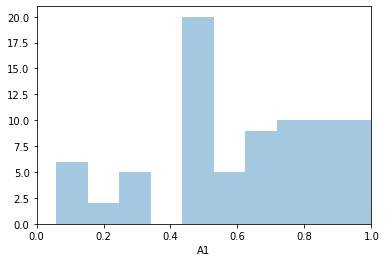

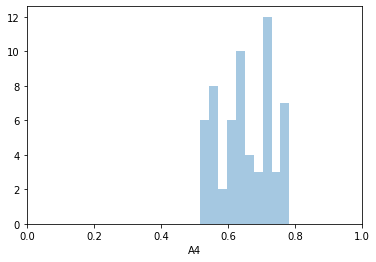

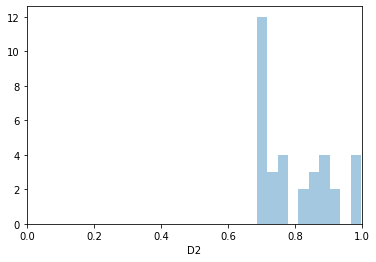

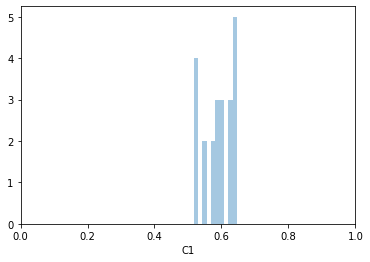

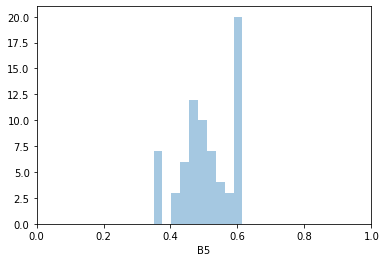

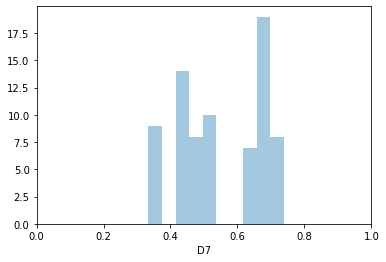

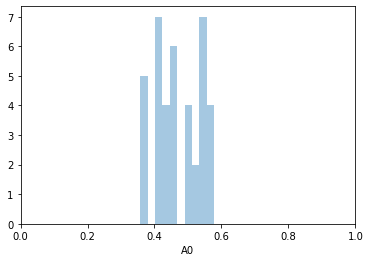

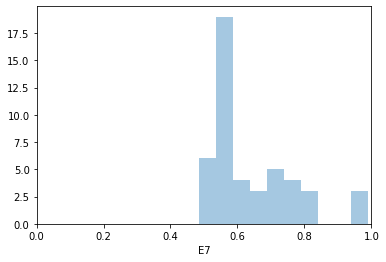

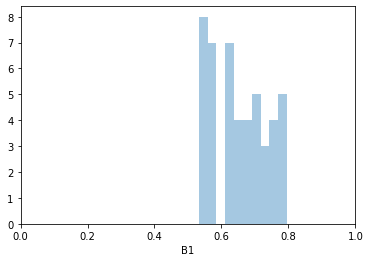

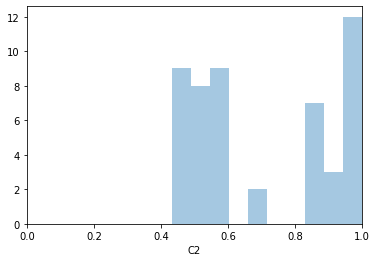

In [34]:
# Histograms - L2 pre
# colors = {'LMC_N': 'tomato', 'centri': 'deepskyblue', 'R2R5': 'lawngreen', 'R3R6': 'gold', 'R1R4': 'orange', 'LMC_1': 'slategrey', 'LMC_3': 'crimson', 'LMC_2': 'hotpink', 'R7p': 'cyan', 'R8': 'mediumorchid', 'LMC_4': 'royalblue', 'R7': 'peru'}

df = dfd.loc[dfd['pre_type'] == 'LMC_2']
di = {}
for index, row in df.iterrows():
    if row['pre_om'] not in di:
        di[row['pre_om']] = [row['transformed_coords']]
    else:
        di[row['pre_om']].append(row['transformed_coords'])
    
for key,value in di.items():
    
    sns.distplot(value, bins=10, kde=False)
    plt.xlabel(str(key))
    plt.xlim(0, 1)
#     plt.ylim(0, 40)
    plt.show()

In [33]:
sdf = pd.DataFrame()
sdf['om'] = di.keys()

s_li = []

for key,value in di.items():
    s = scipy.stats.skew(value)
    s_li.append(s)
    
sdf['skew'] = s_li
    
display(sdf)

,om,skew
0,A3,0.198386
1,C4,-0.084203
2,B6,0.291444
3,C6,0.461559
4,B3,-1.202078
5,C3,-0.564857
6,A2,-0.138427
7,B2,-0.268720
8,D4,-0.220410
9,B4,0.031665


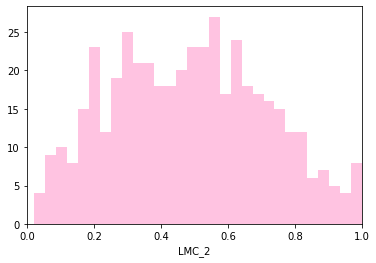

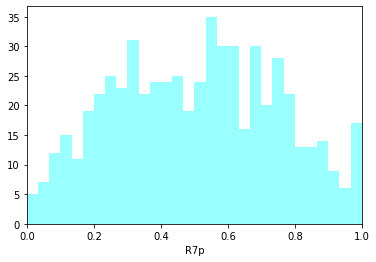

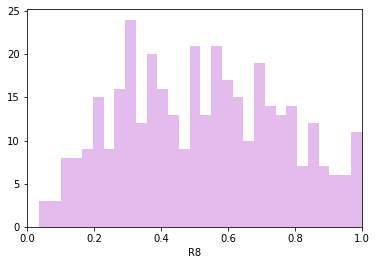

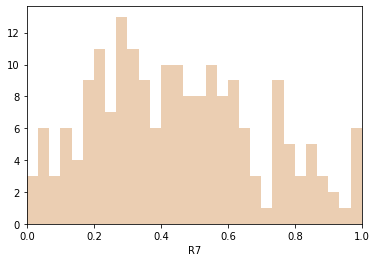

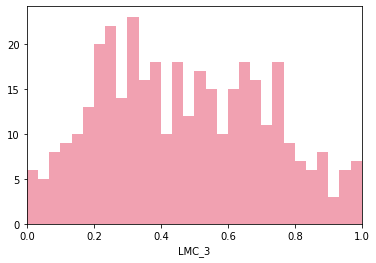

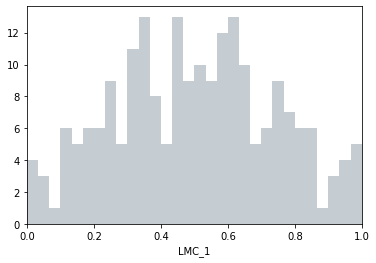

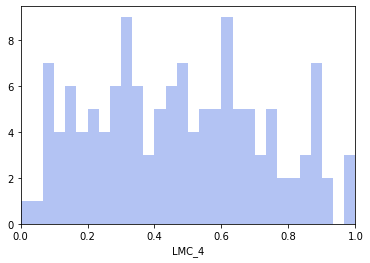

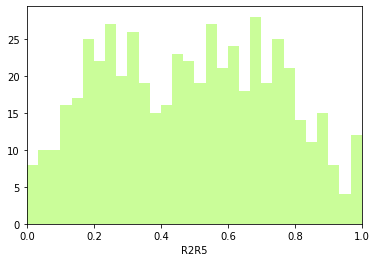

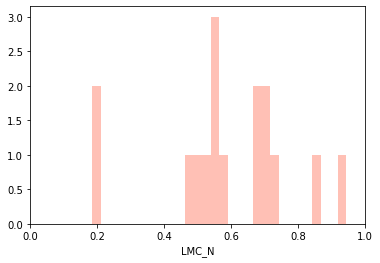

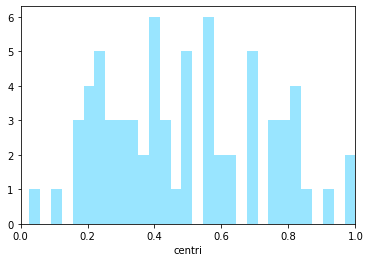

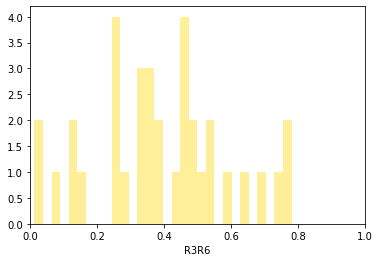

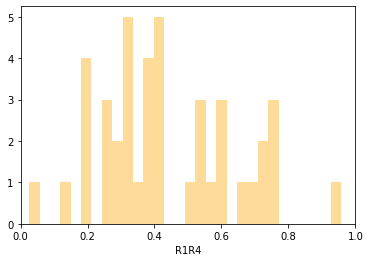

In [8]:
#  Histograms - centri

colors = {'LMC_N': 'tomato', 'centri': 'deepskyblue', 'R2R5': 'lawngreen', 'R3R6': 'gold', 'R1R4': 'orange', 'LMC_1': 'slategrey', 'LMC_3': 'crimson', 'LMC_2': 'hotpink', 'R7p': 'cyan', 'R8': 'mediumorchid', 'LMC_4': 'royalblue', 'R7': 'peru'}

df = dfd.loc[dfd['pre_type'] == 'centri']
di = {}
for index, row in df.iterrows():
    if row['post_type'] not in di:
        di[row['post_type']] = [row['transformed_coords']]
    else:
        di[row['post_type']].append(row['transformed_coords'])
    
for key,value in di.items():
    sns.distplot(value, bins=30, color=colors[key], kde=False)
    plt.xlabel(str(key))
    plt.xlim(0, 1)
    plt.show()

In [ ]:
# Check for correct sign by comparing max untransformed coord with max transformed
# Average over all ommatidia (divide number of coordinates by 29), shape of hist should stay the same, gives per om average
# Print individual oms too, put subtypes together!!!!
# Compare between subtypes - focus on L2 as pre, looks like they're all segregated, calculate skew between different subtypes!!!!
# Calculate skew for totals, and for each om!!!!
# Take out ones that have little data to reduce clutter
# Look for current injection - if I inject something into the cell body, how is that different from injecting it into axon hillock